In [1]:
from google.colab import files
uploaded = files.upload()

Saving SAB.csv to SAB.csv


In [2]:
#1. Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [3]:
# 2. Read file SAB
df = pd.read_csv('SAB.csv')
df["Price"] = df["Price"].str.replace(',', '').astype(float)
df1=df.reset_index()['Price']

In [4]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

<h1># 4. Split the data into training, testing arcording to 7:3

In [5]:
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

In [6]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [7]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [8]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [9]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [10]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 11s 226ms/step - loss: 0.0731
Epoch 2/100
13/13 [==============================] - 2s 150ms/step - loss: 0.0126
Epoch 3/100
13/13 [==============================] - 2s 157ms/step - loss: 0.0059
Epoch 4/100
13/13 [==============================] - 2s 151ms/step - loss: 0.0038
Epoch 5/100
13/13 [==============================] - 2s 143ms/step - loss: 0.0032
Epoch 6/100
13/13 [==============================] - 2s 167ms/step - loss: 0.0031
Epoch 7/100
13/13 [==============================] - 3s 250ms/step - loss: 0.0030
Epoch 8/100
13/13 [==============================] - 2s 157ms/step - loss: 0.0029
Epoch 9/100
13/13 [==============================] - 2s 151ms/step - loss: 0.0029
Epoch 10/100
13/13 [==============================] - 2s 149ms/step - loss: 0.0028
Epoch 11/100
13/13 [==============================] - 2s 145ms/step - loss: 0.0028
Epoch 12/100
13/13 [==============================] - 2s 148ms/step - loss: 0.0027
Epoch 13/100

In [11]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

10/10 [==============================] - 1s 62ms/step


In [12]:
# 11. Chuẩn hóa dữ liệu y_pred, ytest
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

In [13]:
from sklearn.metrics import mean_absolute_error
# 12. Đánh giá độ chính xác thuật toán bằng RMSE , MAE, MAPE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
mae_test = mean_absolute_error(ytest, y_pred)
mape_test = np.mean(np.abs((ytest - y_pred) / ytest)) * 100

print('Testing RMSE:', test_rmse)
print("Test MAE: ", mae_test)
print("Test MAPE: ", mape_test)

Testing RMSE: 2127.745398839894
Test MAE:  1644.727731717687
Test MAPE:  2.470049527766385


In [15]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[-time_step:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.02515405]
101
1 day input [0.0397463  0.04059197 0.0384778  0.03509514 0.03763214 0.03636364
 0.03340381 0.03340381 0.03340381 0.03382664 0.03763214 0.03551797
 0.03298097 0.03298097 0.02663848 0.02029598 0.02283298 0.01987315
 0.01606765 0.02114165 0.01902748 0.01902748 0.02029598 0.02241015
 0.02494715 0.02325581 0.02283298 0.02579281 0.02367865 0.02325581
 0.01902748 0.01733615 0.01606765 0.02198732 0.02536998 0.02579281
 0.02452431 0.02706131 0.0372093  0.03424947 0.03171247 0.02875264
 0.02790698 0.03002114 0.02621564 0.02325581 0.01775899 0.01860465
 0.01860465 0.01987315 0.02029598 0.01902748 0.01860465 0.02114165
 0.01987315 0.01775899 0.01818182 0.01649049 0.01479915 0.01691332
 0.01522199 0.01183932 0.01057082 0.01183932 0.01226216 0.01479915
 0.01057082 0.00972516 0.00634249 0.         0.00295983 0.00211416
 0.00465116 0.00803383 0.00803383 0.01733615 0.01775899 0.01902748
 0.02198732 0.02706131 0.02156448 0.02156448 0.01860465 0.01945032
 0.02156448 0.02114165 0.02367865

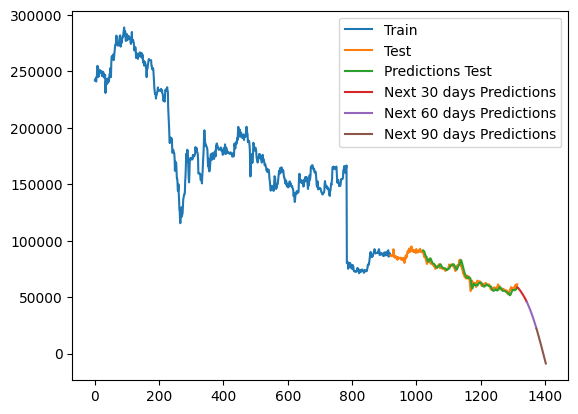

In [16]:
# 14. Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=len(df1), step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size + time_step + 1 , stop=len(df1), step=1)
plt.plot(test_data_index, y_pred)

next_30_days_index = pd.RangeIndex(start=len(df1) - 1, stop=len(df1) + 29, step=1)
plt.plot(next_30_days_index, scaler.inverse_transform(lst_output[:30]))

next_60_days_index = pd.RangeIndex(start=len(df1) + 29, stop=len(df1) + 59, step=1)
plt.plot(next_60_days_index, scaler.inverse_transform(lst_output[30:60]))

next_90_days_index = pd.RangeIndex(start=len(df1) + 59, stop=len(df1) + 89, step=1)
plt.plot(next_90_days_index, scaler.inverse_transform(lst_output[60:]))

plt.legend(['Train', 'Test', 'Predictions Test', 'Next 30 days Predictions', 'Next 60 days Predictions', 'Next 90 days Predictions'])
plt.show()

<h1># 4. Split the data into training, testing arcording to 8:2

In [17]:
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

In [18]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [19]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [20]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [21]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [22]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
15/15 [==============================] - 9s 151ms/step - loss: 0.0610
Epoch 2/100
15/15 [==============================] - 2s 152ms/step - loss: 0.0095
Epoch 3/100
15/15 [==============================] - 2s 161ms/step - loss: 0.0038
Epoch 4/100
15/15 [==============================] - 4s 249ms/step - loss: 0.0029
Epoch 5/100
15/15 [==============================] - 2s 150ms/step - loss: 0.0028
Epoch 6/100
15/15 [==============================] - 2s 160ms/step - loss: 0.0027
Epoch 7/100
15/15 [==============================] - 2s 153ms/step - loss: 0.0026
Epoch 8/100
15/15 [==============================] - 2s 146ms/step - loss: 0.0026
Epoch 9/100
15/15 [==============================] - 3s 224ms/step - loss: 0.0025
Epoch 10/100
15/15 [==============================] - 3s 172ms/step - loss: 0.0025
Epoch 11/100
15/15 [==============================] - 2s 153ms/step - loss: 0.0025
Epoch 12/100
15/15 [==============================] - 2s 164ms/step - loss: 0.0024
Epoch 13/100


In [23]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

6/6 [==============================] - 1s 79ms/step


In [24]:
# 11. Chuẩn hóa dữ liệu y_pred, ytest
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

In [25]:
from sklearn.metrics import mean_absolute_error
# 12. Đánh giá độ chính xác thuật toán bằng RMSE , MAE, MAPE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
mae_test = mean_absolute_error(ytest, y_pred)
mape_test = np.mean(np.abs((ytest - y_pred) / ytest)) * 100

print('Testing RMSE:', test_rmse)
print("Test MAE: ", mae_test)
print("Test MAPE: ", mape_test)

Testing RMSE: 2311.2744648510316
Test MAE:  1808.8435088734568
Test MAPE:  3.0230027860612863


In [26]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[-time_step:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


[0.02370977]
101
1 day input [0.0397463  0.04059197 0.0384778  0.03509514 0.03763214 0.03636364
 0.03340381 0.03340381 0.03340381 0.03382664 0.03763214 0.03551797
 0.03298097 0.03298097 0.02663848 0.02029598 0.02283298 0.01987315
 0.01606765 0.02114165 0.01902748 0.01902748 0.02029598 0.02241015
 0.02494715 0.02325581 0.02283298 0.02579281 0.02367865 0.02325581
 0.01902748 0.01733615 0.01606765 0.02198732 0.02536998 0.02579281
 0.02452431 0.02706131 0.0372093  0.03424947 0.03171247 0.02875264
 0.02790698 0.03002114 0.02621564 0.02325581 0.01775899 0.01860465
 0.01860465 0.01987315 0.02029598 0.01902748 0.01860465 0.02114165
 0.01987315 0.01775899 0.01818182 0.01649049 0.01479915 0.01691332
 0.01522199 0.01183932 0.01057082 0.01183932 0.01226216 0.01479915
 0.01057082 0.00972516 0.00634249 0.         0.00295983 0.00211416
 0.00465116 0.00803383 0.00803383 0.01733615 0.01775899 0.01902748
 0.02198732 0.02706131 0.02156448 0.02156448 0.01860465 0.01945032
 0.02156448 0.02114165 0.02367865

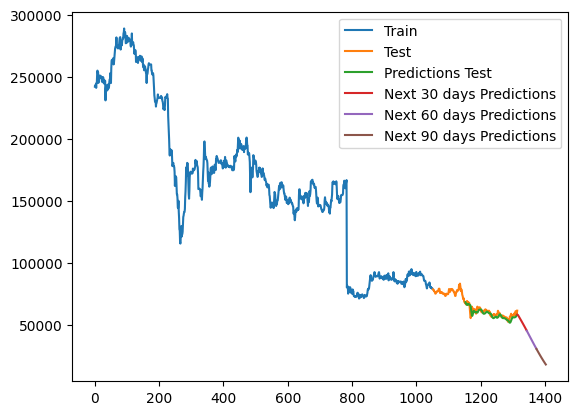

In [27]:
# 14. Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=len(df1), step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size + time_step + 1 , stop=len(df1), step=1)
plt.plot(test_data_index, y_pred)

next_30_days_index = pd.RangeIndex(start=len(df1) - 1, stop=len(df1) + 29, step=1)
plt.plot(next_30_days_index, scaler.inverse_transform(lst_output[:30]))

next_60_days_index = pd.RangeIndex(start=len(df1) + 29, stop=len(df1) + 59, step=1)
plt.plot(next_60_days_index, scaler.inverse_transform(lst_output[30:60]))

next_90_days_index = pd.RangeIndex(start=len(df1) + 59, stop=len(df1) + 89, step=1)
plt.plot(next_90_days_index, scaler.inverse_transform(lst_output[60:]))

plt.legend(['Train', 'Test', 'Predictions Test', 'Next 30 days Predictions', 'Next 60 days Predictions', 'Next 90 days Predictions'])
plt.show()

<h1># 4. Split the data into training, testing arcording to 9:1

In [28]:
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

In [29]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [30]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [31]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [32]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [33]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 [==============================] - 9s 161ms/step - loss: 0.0475
Epoch 2/100
17/17 [==============================] - 4s 216ms/step - loss: 0.0061
Epoch 3/100
17/17 [==============================] - 3s 182ms/step - loss: 0.0032
Epoch 4/100
17/17 [==============================] - 3s 165ms/step - loss: 0.0029
Epoch 5/100
17/17 [==============================] - 3s 149ms/step - loss: 0.0027
Epoch 6/100
17/17 [==============================] - 2s 146ms/step - loss: 0.0027
Epoch 7/100
17/17 [==============================] - 4s 250ms/step - loss: 0.0025
Epoch 8/100
17/17 [==============================] - 3s 149ms/step - loss: 0.0024
Epoch 9/100
17/17 [==============================] - 3s 159ms/step - loss: 0.0024
Epoch 10/100
17/17 [==============================] - 3s 156ms/step - loss: 0.0023
Epoch 11/100
17/17 [==============================] - 3s 195ms/step - loss: 0.0021
Epoch 12/100
17/17 [==============================] - 4s 227ms/step - loss: 0.0021
Epoch 13/100


In [34]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

1/1 [==============================] - 0s 55ms/step


In [35]:
# 11. Chuẩn hóa dữ liệu y_pred, ytest
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

In [36]:
from sklearn.metrics import mean_absolute_error
# 12. Đánh giá độ chính xác thuật toán bằng RMSE , MAE, MAPE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
mae_test = mean_absolute_error(ytest, y_pred)
mape_test = np.mean(np.abs((ytest - y_pred) / ytest)) * 100

print('Testing RMSE:', test_rmse)
print("Test MAE: ", mae_test)
print("Test MAPE: ", mape_test)

Testing RMSE: 2497.909413412087
Test MAE:  2161.995085685484
Test MAPE:  3.7644413141751447


In [37]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[-time_step:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


[0.02355178]
101
1 day input [0.0397463  0.04059197 0.0384778  0.03509514 0.03763214 0.03636364
 0.03340381 0.03340381 0.03340381 0.03382664 0.03763214 0.03551797
 0.03298097 0.03298097 0.02663848 0.02029598 0.02283298 0.01987315
 0.01606765 0.02114165 0.01902748 0.01902748 0.02029598 0.02241015
 0.02494715 0.02325581 0.02283298 0.02579281 0.02367865 0.02325581
 0.01902748 0.01733615 0.01606765 0.02198732 0.02536998 0.02579281
 0.02452431 0.02706131 0.0372093  0.03424947 0.03171247 0.02875264
 0.02790698 0.03002114 0.02621564 0.02325581 0.01775899 0.01860465
 0.01860465 0.01987315 0.02029598 0.01902748 0.01860465 0.02114165
 0.01987315 0.01775899 0.01818182 0.01649049 0.01479915 0.01691332
 0.01522199 0.01183932 0.01057082 0.01183932 0.01226216 0.01479915
 0.01057082 0.00972516 0.00634249 0.         0.00295983 0.00211416
 0.00465116 0.00803383 0.00803383 0.01733615 0.01775899 0.01902748
 0.02198732 0.02706131 0.02156448 0.02156448 0.01860465 0.01945032
 0.02156448 0.02114165 0.02367865

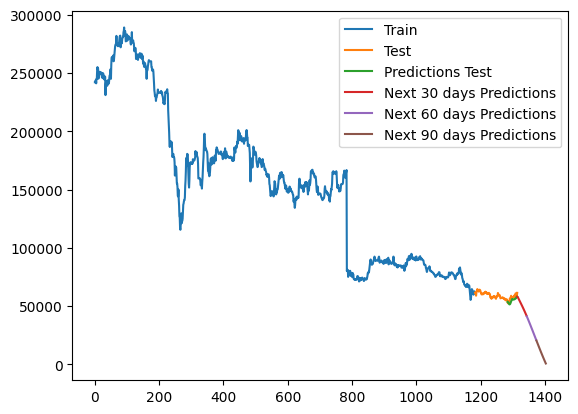

In [38]:
# 14. Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=len(df1), step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size + time_step + 1 , stop=len(df1), step=1)
plt.plot(test_data_index, y_pred)

next_30_days_index = pd.RangeIndex(start=len(df1) - 1, stop=len(df1) + 29, step=1)
plt.plot(next_30_days_index, scaler.inverse_transform(lst_output[:30]))

next_60_days_index = pd.RangeIndex(start=len(df1) + 29, stop=len(df1) + 59, step=1)
plt.plot(next_60_days_index, scaler.inverse_transform(lst_output[30:60]))

next_90_days_index = pd.RangeIndex(start=len(df1) + 59, stop=len(df1) + 89, step=1)
plt.plot(next_90_days_index, scaler.inverse_transform(lst_output[60:]))

plt.legend(['Train', 'Test', 'Predictions Test', 'Next 30 days Predictions', 'Next 60 days Predictions', 'Next 90 days Predictions'])
plt.show()